# Exploring the Data


first few rows of dataset: 
    study_time_hours  exam_result
0              2.78         58.9
1              3.37         54.8
2              7.88         90.3
3              0.67         29.7
4              0.89         43.7

Summary statistics : 
        study_time_hours   exam_result
count      20000.000000  20000.000000
mean           4.007604     62.513225
std            2.308313     18.908491
min            0.080000     19.599000
25%            2.000000     48.800000
50%            4.040000     62.600000
75%            6.000000     76.300000
max            7.910000    100.000000



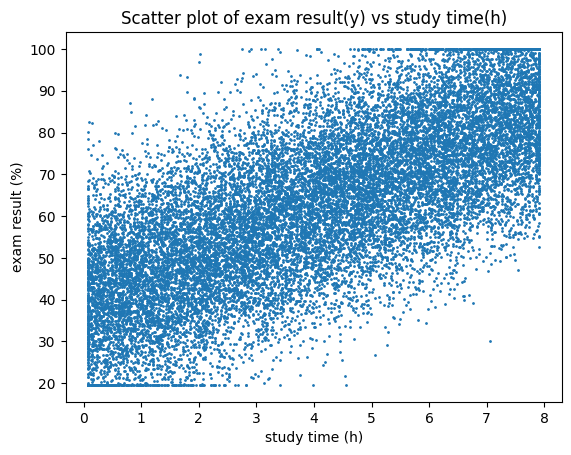

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd. read_csv ("/content/study_hours_and_marks.csv")

print("first few rows of dataset: \n", data.head()) # Look at the first few rows
print()
print("Summary statistics : \n", data.describe()) # summary statistics
print()
plt.scatter( data["study_time_hours"], data ["exam_result"], s=1)
plt.xlabel("study time (h)")
plt.ylabel("exam result (%)")
plt.title("Scatter plot of exam result(y) vs study time(h)")
plt.show()

# Fitting Simple Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Drop rows with any NaN values from the DataFrame
data_cleaned = data.dropna()

X = data_cleaned[["study_time_hours"]]. values # features
y = data_cleaned["exam_result"]. values # label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state =42)

model = LinearRegression ()
model .fit( X_train , y_train )
print (" Intercept ( beta_0 ):", model.intercept_ )
print (" Slope ( beta_1 ):", model.coef_ [0])
y_pred = model.predict ( X_test )

 Intercept ( beta_0 ): 39.01967789342864
 Slope ( beta_1 ): 5.866765273944375


- **Y = 5.866765273944375 * X + 39.01967789342864**     is the our final model.

# Visualizing Fit and Residuals

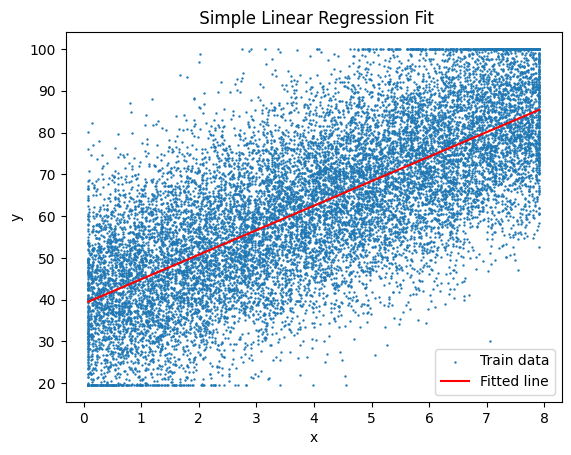

In [29]:
# Plot training data and fitted line
plt.scatter(X_train, y_train, label ="Train data", s = 0.5)
x_line = np.linspace(X.min() , X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label = "Fitted line", color='red')
plt.xlabel ("x")
plt.ylabel ("y")
plt.legend ()
plt.title (" Simple Linear Regression Fit")
plt.show ()

/tmp/ipython-input-424437396.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


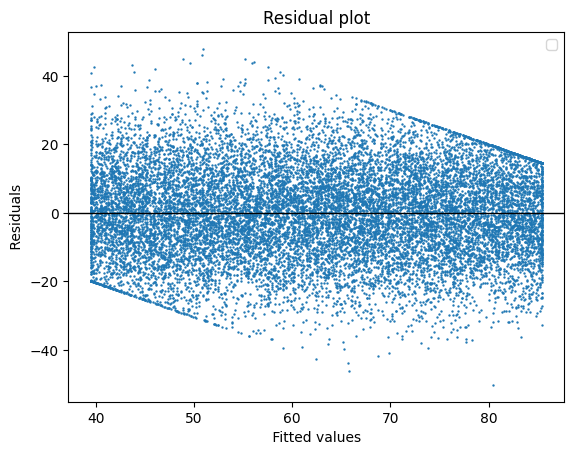

In [28]:
# Residual plot
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred , residuals, s = 0.5)
plt.axhline(0, linewidth = 1, color = "black")
plt.xlabel(" Fitted values ")
plt.ylabel(" Residuals ")
plt.legend()
plt.title("Residual plot")
plt.show()

# Measuring Goodness of Fit

In [22]:
r_squared = model.score(X_test, y_test)
print(f"R-squared value: {r_squared:.4f}")

R-squared value: 0.5245
